Let's define our initial geometry.

In [19]:
A = -50 + 0j
B = 50 + 0j
M = 0 + 0j

Now we compute the dividing points of the marsh sections.

In [182]:
from math import sqrt

In [183]:
marsh_dx = 50 / sqrt(2) * 2 / 5

In [184]:
marsh_middle = 50 / sqrt(2)

In [185]:
marsh_points = [i * marsh_dx - marsh_middle for i in range(6)]
marsh_points

[-35.35533905932737,
 -21.213203435596423,
 -7.0710678118654755,
 7.071067811865468,
 21.21320343559642,
 35.35533905932737]

We can compute the $y$ coordinate of a point $x$ on marsh line $i$ using this formula:

$$
y = x - x_m^i
$$

Where $x_m^i$ is a seed point from the above list.

This is the logic of the function below:

In [188]:
def compute_coordinate(x, line_index):
    """Returns point on line defined by line_index and with given x coordinate."""
    return x + 1j * (x - marsh_points[line_index])

In [189]:
compute_coordinate(-35.35, 0)

(-35.35+0.005339059327369j)

In each section of the marsh, the trajectories are straight lines. 

So the total time is computed as a sum of distances / speeds.

In [190]:
speeds = [10, 9, 8, 7, 6, 5, 10]

We can use the `abs` function for computing the distances since we use complex numbers.

Let's see if we can replicate the travel time from the example.

In [191]:
points = [A] + [compute_coordinate(point, ind) for ind, point in enumerate(marsh_points)] + [B]
points

[(-50+0j),
 (-35.35533905932737+0j),
 (-21.213203435596423+0j),
 (-7.0710678118654755+0j),
 (7.071067811865468+0j),
 (21.21320343559642+0j),
 (35.35533905932737+0j),
 (50+0j)]

In [192]:
time = lambda points, speeds: sum(abs(from_ - to_) / speed_ for from_, to_, speed_ in zip(points[:-1], points[1:], speeds))

In [193]:
time(points, speeds)

13.473802361543434

In [194]:
distance = lambda points: sum(abs(from_ - to_) for from_, to_ in zip(points[:-1], points[1:]))

In [195]:
distance(points)

100.0

Ok, we're matching. So now, let's minimize this. It could definitely be interesting to do an autodiff with that.

In [196]:
from random import random, randint

In [197]:
from math import exp

In [198]:
random_sign = lambda : (lambda r: (r - 0.5)/abs(r - 0.5))(random())

In [199]:
random_sign()

1.0

In [200]:
def modify_points(points, index, dx):
    """Modifies points and returns copy."""
    new_points = [p for p in points]
    p = compute_coordinate(new_points[index].real + dx, index-1)
    new_points[index] = p
    return new_points

In [201]:
points

[(-50+0j),
 (-35.35533905932737+0j),
 (-21.213203435596423+0j),
 (-7.0710678118654755+0j),
 (7.071067811865468+0j),
 (21.21320343559642+0j),
 (35.35533905932737+0j),
 (50+0j)]

In [202]:
modify_points(points, 6, 0.01)

[(-50+0j),
 (-35.35533905932737+0j),
 (-21.213203435596423+0j),
 (-7.0710678118654755+0j),
 (7.071067811865468+0j),
 (21.21320343559642+0j),
 (35.36533905932737+0.00999999999999801j),
 (50+0j)]

Our improvement procedure is simple: choose a point, move it by dx and keep the arrangement if it's better than the previous one (hillclimbing, inspired by [Norvig's gesture typing](http://nbviewer.jupyter.org/url/norvig.com/ipython/Gesture%20Typing.ipynb)).

In [229]:
def improve(initial_points, max_dx, steps=1000):
    """Hillclimbing strategy to find best trajectory."""
    points = initial_points
    current_time = time(points, speeds)
    for step in range(steps):
        dx = random_sign() * max_dx * exp(-step / steps * 20)
        new_points = modify_points(points, randint(1, 6), dx)
        if time(new_points, speeds) < current_time:
            current_time = time(new_points, speeds)
            points = new_points
    return points

Let's now run our problem:

In [230]:
initial_points = points
new_points = improve(initial_points, 10., steps=100000)

In [231]:
time(new_points, speeds)

13.126510858558497

In [232]:
distance(new_points)

102.13458074876188

Let's look at the optimal solution that was found:

In [233]:
def plot_points(points):
    """plots some points"""
    plt.plot([p.real for p in points], [p.imag for p in points], '-o')

In [234]:
import matplotlib.pyplot as plt
%matplotlib inline

(-55.0, 55.0, -4.5411298101973614, 5.6681232353269273)

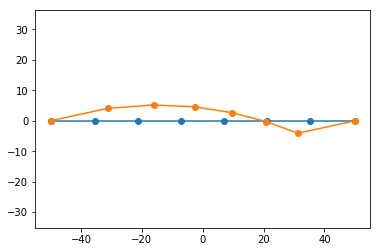

In [235]:
plot_points(points)
plot_points(new_points)
plt.axis('equal')

Let's round our answer to print it:

In [236]:
round(time(new_points, speeds), 10)

13.1265108586